# Calculus with Python - Part 2
_______________________

## Limits, Derivatives, & Integrals

### **Limits**

Sympy comes with its own `limit` function, which makes computing limits pretty straightforward. I will print out a series of limit problems, and then demonstrate how to use sympy to solve each of them: <br>

**a.** $\lim_{x \to 3} f(x)$ where $f(x) = x^2$ <br>

**b.** $\lim_{x \to 0} g(x)$ where $g(x) = \frac{\lvert x \rvert }{x}$ <br>

**c.** $\lim_{x \to +\infty} h(x)$ where $h(x) = \frac{(x + 1)^3}{(x - 1)}$ <br>

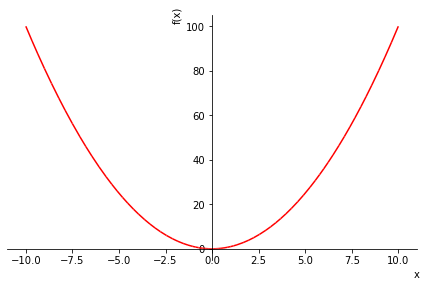

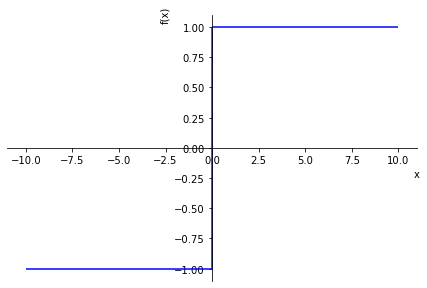

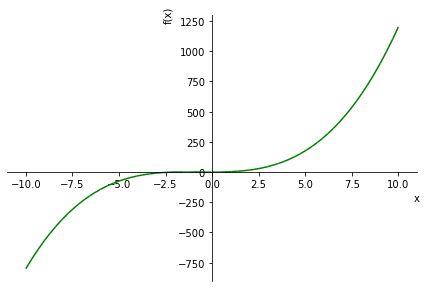

In [1]:
from sympy import *
init_session(quiet = True) 

%matplotlib inline

f_x = x**2
g_x = Abs(x)/x
h_x = x**3 + 2*x**2

plot_a = plotting.plot(f_x, line_color='red')
plot_b = plotting.plot(g_x, line_color='blue')
plot_c = plotting.plot(h_x, line_color='green')

To solve $\lim_{x \to 3} f(x)$, use the sympy `limit` function using the following format/parameters:

`limit(function, symbol, limit)`

In [2]:
limit(f_x, x, 3)

Easy! Unfortunately, SymPy calculates limits using a series expansion. Because this is only an approximation, functions that contain discontinuities or domain constraints are often calculated incorrectly. For example, the limit as $g(x)$ approaches zero has no solution. However, Sympy approximates the limit to be either 1 or -1:

In [3]:
limit(g_x, x, 0)

Luckily, [workarounds](https://medium.com/swlh/fixing-sympys-limit-calculation-flaws-5b46440f97c1) exist that make taking limits of this nature doable. Creating a custom [function](https://docs.python.org/3/tutorial/controlflow.html#defining-functions) that takes the limit at points close to the original "approaching" point makes this a simple process.

In [4]:
def lim(func, variable, approaching, approachFrom='None'):
    """
    Custom limit function that handles discontinuities
    param func: function that you are taking the limit of
    param variable: variable in the function
    param approaching: the number your are approaching in the limit
    param approachFrom: direction approaching from; either "-", "+", or "None"
    """
    # If the `approachFrom` direction is negative:
    if approachFrom=='-':
        # substitute the original `approaching` parameter with a number slightly to the left
        if func.subs(variable, approaching - 1e-6).is_real: 
            return sympy.limit(func, variable, approaching, approachFrom)
        else:
            print('Limit does not exist')
    # If the `approachFrom` direction is positive:
    elif approachFrom == '+':
        # substitute the original `approaching` parameter with a number slightly to the right
        if func.subs(variable, approaching + 1e-6).is_real:
            return sumpy.limit(func, variable, approaching, approachFrom)
        else:
            print('Limit does not exist')
    # If the `approachFrom` direction is neither, test both and subtruct:
    else:
        # substitute the original `approaching` parameter with a number slightly to the left and to the right, then subtract
        leftApprox = func.subs(variable, approaching - 1e-6)
        rightApprox = func.subs(variable, approaching + 1e-6)
        if Abs(leftApprox-rightApprox) < 0.1:
            return sympy.limit(func, variable, approaching)
        else:
            print('Limit does not exist')

lim(g_x, x, 0)

Limit does not exist


If the limit is infinity, this can easily be specified using double "o". Evaluating the limit on only one side can also be done through an additional argument `'+'` or `'-'`:

In [5]:
lim(h_x, x, oo, '+')

Limit does not exist


Additional documentation can be found at the official SymPy website: [https://docs.sympy.org/latest/tutorial/calculus.html#limits](https://docs.sympy.org/latest/tutorial/calculus.html#limits)

### **Derivatives**

Differentiating with SymPy is can be accomplished using the `diff()` function. Like we have done in prior posts, I will demonstrate through several examples: <br>

**a.** For $f(x)=3x^2-4x+1$, find $f'(3)$ <br>

**b.** For $g(x)=\ln(\frac{x^2}{2x + 1})$, find $g''(1)$ <br>

**c.** For $h(x, y)=y^3x^2$, find $\frac{\partial h}{\partial x}(1, 2)$ <br>

**d.** For the same h(x, y), find $\frac{\partial x}{\partial y}(1, 2)$ <br>

**e.** For the same h(x, y), find $\frac{\partial^2 x}{\partial^3 y}(1, 2)$ <br>


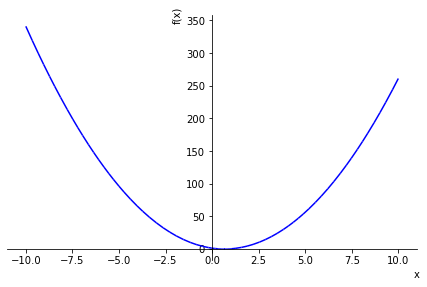

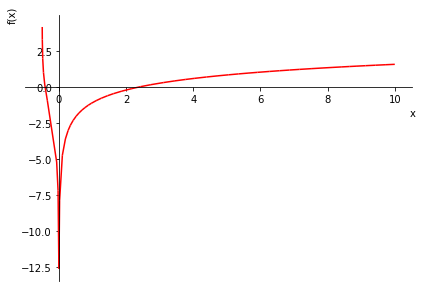

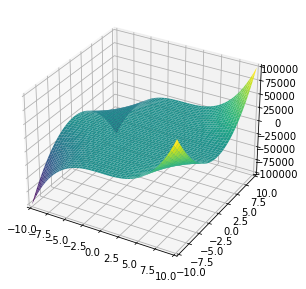

In [6]:
f_x = 3*x**2 - 4*x + 1
g_x = ln(x**2 / (2*x + 1))
h_x = y**3 * x**2

p1 = plotting.plot(f_x, line_color='blue')
p2 = plotting.plot(g_x, line_color='red')
p3 = plotting.plot3d(h_x)

Differentiating an equation is done through the `diff()` function as follows:

In [7]:
# Differentiate f(x) with respect to x
diff(f_x, x) 

To evaluate, substitue the number in for the variable using the `subs` method:

In [8]:
# Differentiate f(x) with respect to x, where x = 2
diff(f_x, x).subs(x, 2)

Notice that problem **b** is a derivative of the second order. To solve this, an additional argument `2` is added to the `diff()` function after the variable $x$:

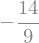

In [9]:
diff(g_x, x, 2).subs(x, 1)

Partial derivatives such as those in problem **c** are not too different from the prior examples. Simply differentiate with respect to $x$, and substitute for both $x$ and $y$ when evaluating using the `subs` method:

In [10]:
diff(h_x, x).subs(x, 1).subs(y, 2)

Multi-Variate Differentiation is also similar, but this time differentiate with respect to x and y:

In [11]:
diff(h_x, x, y).subs(x, 1).subs(y, 2)

For higher orders of differentiation, the order for each variable can be specified as an argument following each of the respective variables in the `diff()` function:

In [12]:
diff(h_x, x, 2, y, 3).subs(x, 1).subs(y, 2)

Additional documentation can be found at the official SymPy website: [https://docs.sympy.org/latest/tutorial/calculus.html#derivatives](https://docs.sympy.org/latest/tutorial/calculus.html#derivatives)

### **Integrals**

Integrating with SymPy is done through the `integrate()` function with the expression as the first argument, and a tuple as the second argument that matches the following format: <br>
(`integration_variable`, `lower_limit`, `upper_limit`)

The following problems will be used as examples:

**a.** Given $f(x)=x^3 - 2x^2 + 4x$, find $\int_{-1}^{1} f(x) \,dx$ <br>

**b.** For the same $f(x)$, find $\int_{-\infty}^{0} f(x) \,dx$ <br>

**c.** Given $g(x, y)=3x^2 + y^2$, find $\iint_D g(x, y) \,dA$ where {$(x,y)| -2 \leq y \leq 3, y^2 - 3 \leq x \leq y + 3$} <br>

In [13]:
f_x = x**3 - 2*x**2 + 4*x
integrate(f_x, (x, -1, 1))

If the upper/lower limit is infinity, this can easily be specified using double "o" as follows:

In [14]:
integrate(f_x, (x, -oo, 0))

Problem **c** $\iint_D 3x^2 + y^2 \,dA$ where {$(x,y)| -2 \leq y \leq 3, y^2 - 3 \leq x \leq y + 3$} can also be written as: <br>

$\int_{y=-2}^{y=3}\int_{x=y^2-3}^{x=y^2+3} 3x^2 + y^2 \,dx \,dy$ <br>

When solving this in SymPy, the outer-most integral is the last argument, and the innermost is the second argument (following the original expression). The same pattern continues for triple integrals.

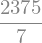

In [15]:
g_x = 3*x**2 + y**2
integrate(g_x, (x, y**2 -3, y + 3), (y, -2, 3))

Additional documentation can be found at the official SymPy website: [https://docs.sympy.org/latest/tutorial/calculus.html#integrals](https://docs.sympy.org/latest/tutorial/calculus.html#integrals)